# Get all data files from data dir

In [2]:
%%bash
data_dir=/home/rmeier/GIT/MassBank-data
find $data_dir -name MSBNK*.txt -exec grep -Lr 'DEPRECATED:' {} \+ > file_list.tmp
head -n10 file_list.tmp
echo Found `cat file_list.tmp | wc -l` record files


/home/rmeier/GIT/MassBank-data/NAIST/MSBNK-NAIST-KNA00006.txt
/home/rmeier/GIT/MassBank-data/NAIST/MSBNK-NAIST-KNA00115.txt
/home/rmeier/GIT/MassBank-data/NAIST/MSBNK-NAIST-KNA00396.txt
/home/rmeier/GIT/MassBank-data/NAIST/MSBNK-NAIST-KNA00485.txt
/home/rmeier/GIT/MassBank-data/NAIST/MSBNK-NAIST-KNA00483.txt
/home/rmeier/GIT/MassBank-data/NAIST/MSBNK-NAIST-KNA00817.txt
/home/rmeier/GIT/MassBank-data/NAIST/MSBNK-NAIST-KNA00800.txt
/home/rmeier/GIT/MassBank-data/NAIST/MSBNK-NAIST-KNA00273.txt
/home/rmeier/GIT/MassBank-data/NAIST/MSBNK-NAIST-KNA00102.txt
/home/rmeier/GIT/MassBank-data/NAIST/MSBNK-NAIST-KNA00116.txt
Found 120184 record files


# Get all 'DATES' from files

In [4]:
%%bash
xargs -n 1000 -d '\n' -a file_list.tmp grep -h 'DATE:' | awk '{print $2}' > dates.tmp
echo Found `cat dates.tmp | wc -l` dates

Found 120184 dates


# Sort and count dates

In [5]:
%%bash
sort dates.tmp | uniq -c > dates_sorted.tmp
echo Found `cat dates_sorted.tmp | wc -l` sorted and counted dates

Found 354 sorted and counted dates


# Make a graph

            cummulated records
date                          
2006-04-19                  31
2006-04-20                  53
2006-04-21                  63
2006-04-24                  68
2006-04-26                  81
...                        ...
2023-12-15              117889
2023-12-21              119028
2024-01-16              119182
2024-05-08              119915
2024-05-15              120184

[354 rows x 1 columns]


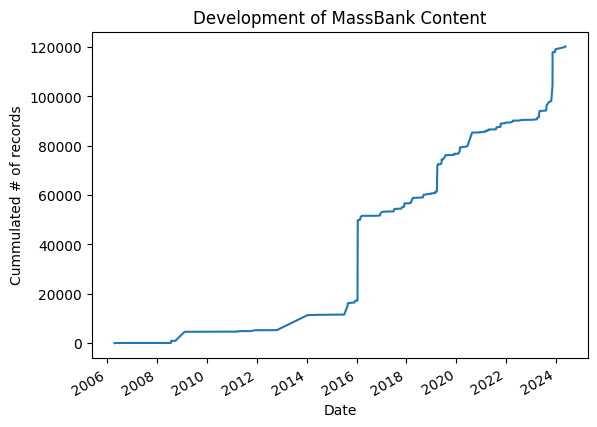

In [8]:
import pandas as pd
import datetime
import csv
import os


#outPath='casmi2017/parameters'
#if not os.path.exists(outPath):
#    os.makedirs(outPath)

dates = pd.read_csv("dates_sorted.tmp", names=['count', 'date'], sep=r'\s+')
dates["date"] = pd.to_datetime(dates["date"], format="%Y.%m.%d" )
#df[2] = pd.to_datetime(df[2])

#dates.cumsum()
dates["cummulated records"] = dates["count"].cumsum()
dates = dates[["date", "cummulated records"]]
dates = dates.set_index('date')
print(dates) 
plot = dates.plot(xlabel='Date', ylabel='Cummulated # of records', title='Development of MassBank Content', legend=False)

